In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

titanics=pd.read_csv("C:/Users/Lenovo/Downloads/titanic.csv")
titanics

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Cleaning the Dataset

In [6]:
titanics_new=titanics.drop(['Name','Ticket','Cabin'],axis=1)
titanics_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


23.0896 7.9104 31.0
65.6344 -26.724


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


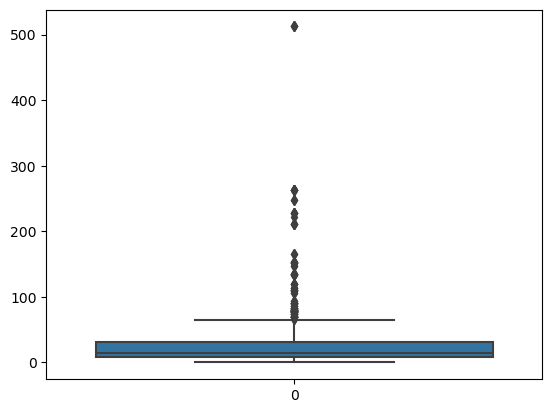

In [7]:
sns.boxplot(titanics_new['Fare'])
#The Dataset had outliers so we will remove the outliers in order to completely clean the data
#Using the iqr method
q1=titanics_new['Fare'].quantile(.25)
q3=titanics_new['Fare'].quantile(.75)
iqr=q3-q1
print(iqr,q1,q3)
upper_bounds=q3+(1.5*iqr)
lower_bounds=q1-(1.5*iqr)
print(upper_bounds,lower_bounds)
removed=titanics_new[(titanics_new['Fare']>=lower_bounds ) & (titanics_new['Fare']<=upper_bounds)]
removed


In [8]:
removed.shape

(775, 9)

In [9]:

for i in removed['Sex']:
    if i=='male' :
        removed['Sex'].replace('male',1,inplace=True)
    elif i=='female':
        removed['Sex'].replace('female',0,inplace=True)  
        
removed['Age']=removed['Age'].interpolate(method='linear')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\4121901864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Sex'].replace('male',1,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\4121901864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Sex'].replace('female',0,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\4121901864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<Axes: >

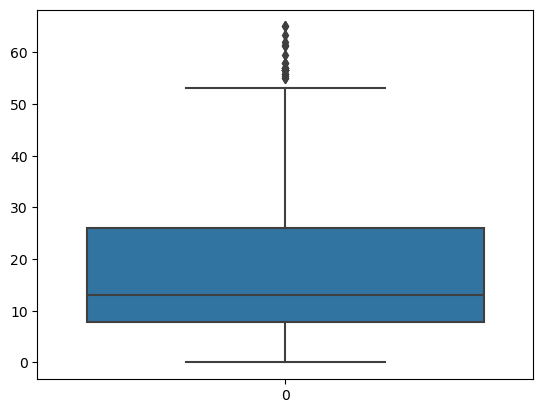

In [10]:
sns.boxplot(removed['Fare'])

In [11]:
removed['Age'].astype(int)


0      22
2      26
3      35
4      35
5      44
       ..
886    27
887    19
888    22
889    26
890    32
Name: Age, Length: 775, dtype: int32

In [12]:
Age_group=[]
for agegrp in removed['Age']:
    if 0>= agegrp <=4  :
        Age_group.append("Infants and Toddlers")
    elif  5>= agegrp <=12:
        Age_group.append("Children")
    elif 12> agegrp <=19:
        Age_group.append("Teens")
    elif 20> agegrp <=29 :
        Age_group.append("Young Adults")
    elif 30> agegrp <=39 :
        Age_group.append("Adults")   
    elif 40> agegrp <=59:
        Age_group.append("Mid-Aged Adults")
    else:
        Age_group.append("Seniors")                      
        
removed['Age_Group']=Age_group        
removed['Age_Group']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\1626087619.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Age_Group']=Age_group


0               Adults
2               Adults
3      Mid-Aged Adults
4      Mid-Aged Adults
5              Seniors
            ...       
886             Adults
887       Young Adults
888             Adults
889             Adults
890    Mid-Aged Adults
Name: Age_Group, Length: 775, dtype: object

In [13]:
all_age_groups = removed['Age_Group'].unique()
vAL_counts=removed['Age_Group'].value_counts()
print(all_age_groups)
print(vAL_counts)

['Adults' 'Mid-Aged Adults' 'Seniors' 'Children' 'Young Adults' 'Teens']
Age_Group
Adults             249
Mid-Aged Adults    192
Seniors            155
Young Adults       105
Children            44
Teens               30
Name: count, dtype: int64


In [14]:
removed['Family Size']=removed['Parch']+removed['SibSp']
removed.groupby('Family Size')['Survived'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\649319347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Family Size']=removed['Parch']+removed['SibSp']


Family Size
0    0.270378
1    0.487603
2    0.575000
3    0.727273
4    0.076923
5    0.055556
6    0.333333
7    0.000000
Name: Survived, dtype: float64

In [15]:
removed['Family Size'].value_counts()
removed['Survived']

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64

<Axes: xlabel='count', ylabel='Age_Group'>

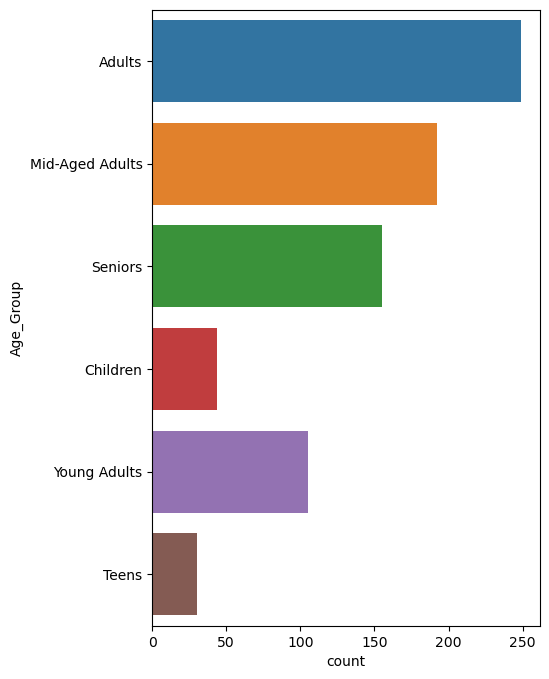

In [16]:
#count plot :
import seaborn as sns
plt.figure(figsize=(5,8))
sns.countplot(data=removed,y=removed['Age_Group'])

Survived
0    512
1    263
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\3398035907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Surviveds']=removed['Survived'].replace({1:'Yes',0:'No'})


Text(0.5, 1.0, 'Passengers survived by gender')

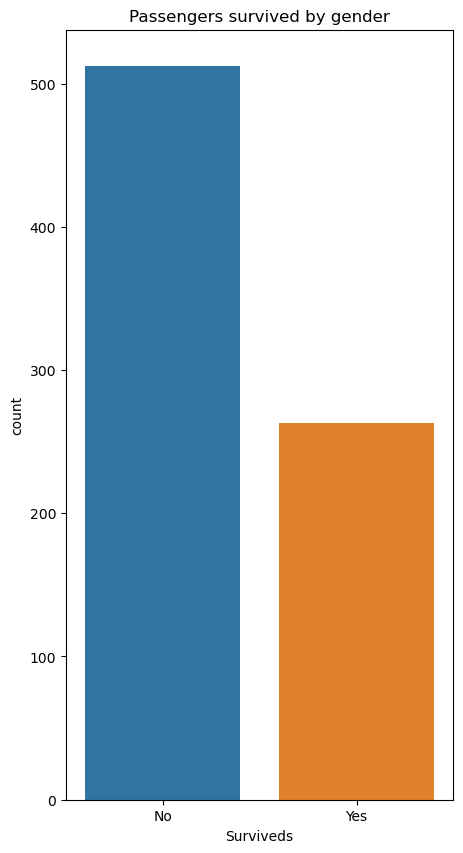

In [17]:
removed['Surviveds']=removed['Survived'].replace({1:'Yes',0:'No'})

surv=removed['Survived'].value_counts()
print(surv)
plt.figure(figsize=(5,10))
sns.countplot(data=removed,x=removed['Surviveds'])
plt.title("Passengers survived by gender")

In [18]:
removed.groupby('Age_Group')['Survived'].mean()

Age_Group
Adults             0.321285
Children           0.681818
Mid-Aged Adults    0.328125
Seniors            0.303226
Teens              0.266667
Young Adults       0.333333
Name: Survived, dtype: float64

In [19]:
removed.groupby('Sex')['Survived'].mean()

Sex
0    0.688525
1    0.178908
Name: Survived, dtype: float64

In [20]:
removed.groupby('Embarked')['Survived'].mean()

Embarked
C    0.448276
Q    0.386667
S    0.311644
Name: Survived, dtype: float64

In [21]:
removed['REPLACED']=removed['Pclass'].replace({1:'A',2:'B',3:'C'})
removed.groupby('REPLACED')['Survived'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\1516611077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['REPLACED']=removed['Pclass'].replace({1:'A',2:'B',3:'C'})


REPLACED
A    0.508929
B    0.486034
C    0.245868
Name: Survived, dtype: float64

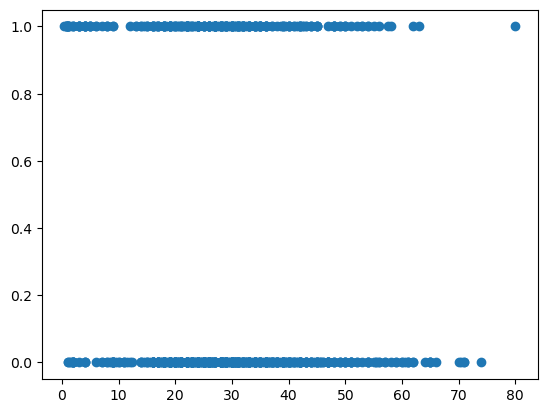

In [22]:
plt.scatter(x=removed['Age'],y=removed['Survived'])

In [23]:
new=removed[['Age','Survived','Fare','Pclass']]

Age        -0.107000
Survived    1.000000
Fare        0.234422
Pclass     -0.238532
Name: Survived, dtype: float64


<Axes: >

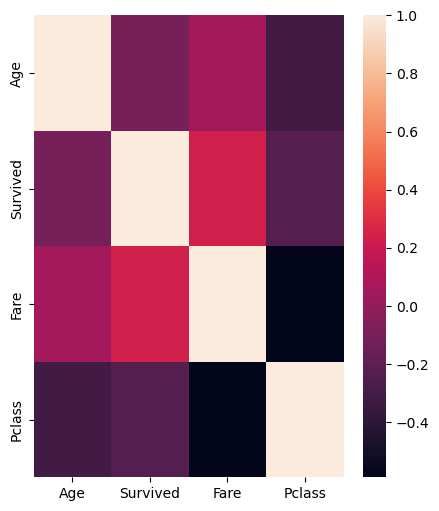

In [24]:
cor=new.corr()
corwith=cor['Survived']
print(corwith)
plt.figure(figsize=(5,6))
sns.heatmap(cor)

Text(0.5, 1.0, 'Percentages of Survival')

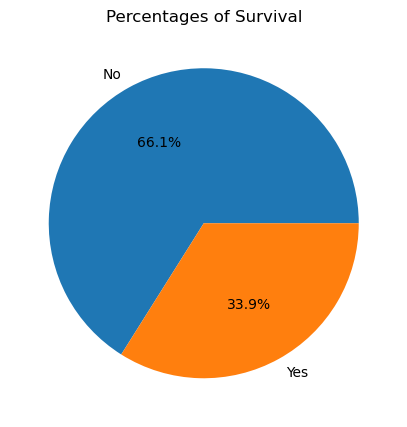

In [25]:
removed['Survived'].value_counts()
data=[51.2,26.3]
label=['No','Yes']
plt.figure(figsize=(5,8))
plt.pie(x=data,labels=label,autopct='%1.1f%%')
plt.title("Percentages of Survival")

Text(0.5, 1.0, 'Distribution of Survivers on the basis of Embarked(where they boarded from)')

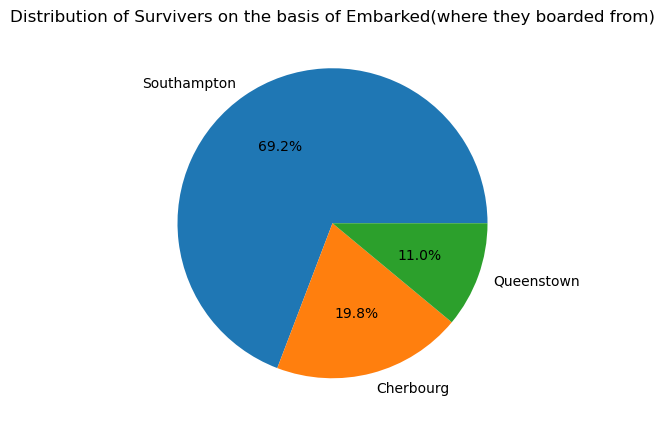

In [26]:
new_col=removed[removed['Survived']==1]
new_col
new_col['Embarked'].value_counts()
label=['Southampton','Cherbourg','Queenstown']
data=[182,52,29]
plt.figure(figsize=(5,8))
plt.pie(x=data,labels=label,autopct='%1.1f%%')
plt.title('Distribution of Survivers on the basis of Embarked(where they boarded from)')

Text(0.5, 1.0, 'Passengers survived on the basis of their gender')

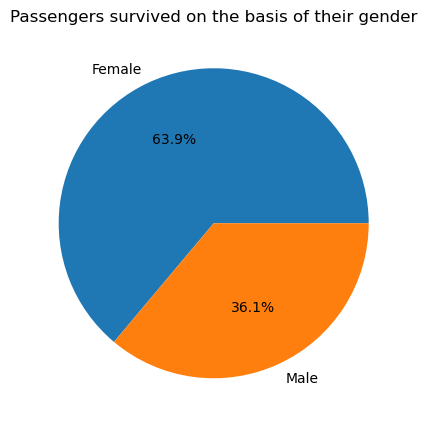

In [27]:
new_col['Sex'].value_counts()
data=[168,95]
label=['Female','Male']
plt.figure(figsize=(5,8))
plt.pie(x=data,labels=label,autopct='%1.1f%%')
plt.title("Passengers survived on the basis of their gender")



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\383763842.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_col['Age_Group']=Age_group


Text(0.5, 1.0, 'Percentages of survivors amongst different age groups')

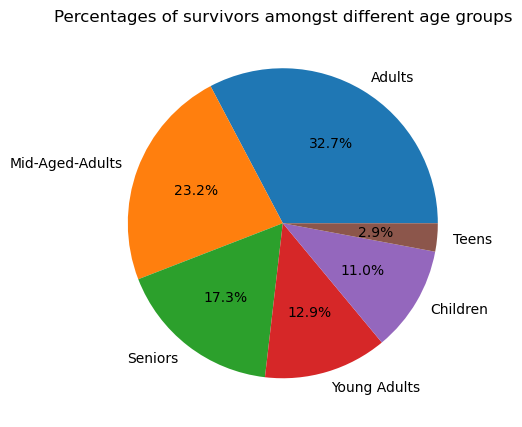

In [28]:
Age_group=[]
for agegrp in new_col['Age']:
    if 0>= agegrp <=4  :
        Age_group.append("Infants and Toddlers")
    elif  5>= agegrp <=12:
        Age_group.append("Children")
    elif 12> agegrp <=19:
        Age_group.append("Teens")
    elif 20> agegrp <=29 :
        Age_group.append("Young Adults")
    elif 30> agegrp <=39 :
        Age_group.append("Adults")   
    elif 40> agegrp <=59:
        Age_group.append("Mid-Aged Adults")
    else:
        Age_group.append("Seniors")                      
        
new_col['Age_Group']=Age_group        
new_col['Age_Group'].value_counts()
data=[89,63,47,35,30,8]
label=['Adults','Mid-Aged-Adults','Seniors','Young Adults','Children','Teens',]
plt.figure(figsize=(5,8))
plt.pie(x=data,labels=label,autopct='%1.1f%%')
plt.title('Percentages of survivors amongst different age groups')

In [29]:
removed['Sex']=titanics['Sex']
removed['Sex']=removed['Sex'].replace({'female':0,"male":1})
removed['Pclass']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\1622048076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Sex']=titanics['Sex']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1984\1622048076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['Sex']=removed['Sex'].replace({'female':0,"male":1})


0      3
2      3
3      1
4      3
5      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 775, dtype: int64

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'removed' is the DataFrame containing your cleaned data
# Select features for logistic regression
features = ['Age', 'Pclass', 'Sex']  # Correct way to list multiple columns
X = removed[features]
y = removed['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)





Accuracy: 0.76
Confusion Matrix:
[[128  23]
 [ 32  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.61      0.65        82

    accuracy                           0.76       233
   macro avg       0.74      0.73      0.73       233
weighted avg       0.76      0.76      0.76       233



In [31]:
#prediction on a specific sample
test_saample=pd.DataFrame({'Age':[21],'Pclass':[1],'Sex':[1]})
test_saample
scaled_data=scaler.transform(test_saample)
predicted_proba = model.predict_proba(scaled_data)
predicted=model.predict(scaled_data)
print(predicted)
print(predicted_proba)

[1]
[[0.41463941 0.58536059]]
